In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3 MB 23 kB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
     |████████████████████████████████| 3.8 MB 47.9 MB/s 
     |████████████████████████████████| 503 kB 66.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=7bd1329d9db683f94b6b7b2c7413fef9b4b9876210f6cafff138f1b58da287bb
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Succes

/content/drive/MyDrive/ML-Project-new/noise2noise
Noise sigmas:  0,5,10,15,20,25,30,35,40,45
Validating with poisson_noise_stddev:  0.0
Creating the run dir: results/00601-autoencoder
Copying files to the run dir
dnnlib: Running validation.validate() on localhost...
Average PSNR: 30.26
Average psnr printed in def validate is :
0.0 30.26214371197348
dnnlib: Finished validation.validate() in 32s.
Validating with poisson_noise_stddev:  5.0
Creating the run dir: results/00602-autoencoder
Copying files to the run dir
dnnlib: Running validation.validate() on localhost...
Average PSNR: 30.26
Average psnr printed in def validate is :
0.0 30.26214371197348
5.0 30.258976994423147
dnnlib: Finished validation.validate() in 32s.
Validating with poisson_noise_stddev:  10.0
Creating the run dir: results/00603-autoencoder
Copying files to the run dir
dnnlib: Running validation.validate() on localhost...
Average PSNR: 30.26
Average psnr printed in def validate is :
0.0 30.26214371197348
5.0 30.25897699

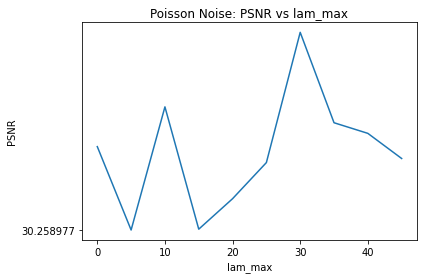

In [7]:
%cd /content/drive/MyDrive/ML-Project-new/noise2noise
dataset = "BSDS300"
noise = "poisson"
#noise = "gaussian"
use_pretrained_model = 1
training_model = "/content/drive/MyDrive/ML-Project-new/noise2noise/results/bsd300_train_kodak_valid/bsd300_train_kodak_valid.pickle"
#training_model = "/content/drive/MyDrive/ML-Project-new/noise2noise/results/layerinc_trainbsd_validkodak/network_final.pickle"
if dataset == "BSDS300":
  dataset_dir = "/content/drive/MyDrive/ML-Project-new/BSDS300/images/test"
elif dataset == "kodak":
  dataset_dir = "/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/kodak"
if use_pretrained_model==1:
  if noise == "poisson":
    training_model = "/content/drive/MyDrive/ML-Project-new/pre-trained-models/network_final-poisson-n2n.pickle"
  elif noise == "gaussian":
    training_model = "/content/drive/MyDrive/ML-Project-new/pre-trained-models/network_final-gaussian-n2n.pickle"

noise_mag = [0,50,5]
stddev = str(noise_mag[0])
for i in range(noise_mag[0]+noise_mag[2],noise_mag[1],noise_mag[2]):
  stddev = stddev + "," + str(i)

##LOOK AT THIS
#dataset_dir = "/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data"
#stddev = str(0)
##dataset_dir = "/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/original"
##
video = 0
#video_path ="/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/Videos/camera_moving/Street"
if video:
  dataset_dir = video_path 
  video_dir = video_path + "/*.mp4"
  print("Noise sigmas: ",stddev)
  %run config_raghu.py validate_video --dataset-dir=$dataset_dir --video-dir=$video_dir --noise=$noise --network-snapshot=$training_model --noise_stddev=$stddev
else:
  print("Noise sigmas: ",stddev)
  %run config_raghu.py validate --dataset-dir=$dataset_dir --noise=$noise --network-snapshot=$training_model --noise_stddev=$stddev

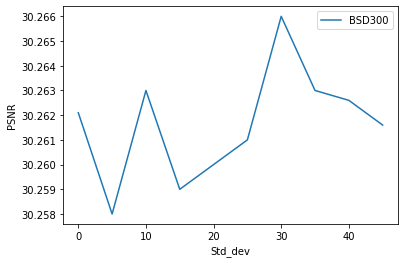

In [20]:
import numpy as np
import matplotlib.pyplot as plt
psnr = {
    "dataset" :[["kodak"],["BSD300"]],
    "G" : [[55.466,40.398,36.848,34.842,33.449,32.386,31.536,30.830,30.217,29.695],[57.345,39.808,35.801,33.606,32.118,31.009,30.128,29.411,28.796,28.268]],
    "P" : [[31.647,31.657,31.650,31.653,31.648,31.652,31.649,31.643,31.652,31.653],[30.2621,30.258,30.263,30.259,30.260,30.261,30.266,30.263,30.2626,30.2616]]
}
std_dev = np.arange(0,50,5)
#plt.plot(std_dev,psnr["P"][0])
plt.plot(std_dev,psnr["P"][1])
plt.xlabel("Std_dev")
plt.ylabel("PSNR")
plt.legend(['BSD300'], loc='upper right')

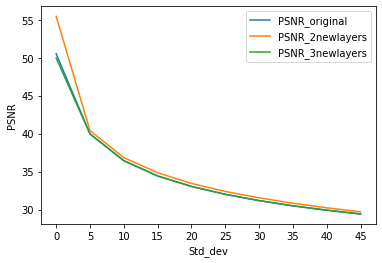

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
psnr_orig = np.array([50.5271,39.9748,36.4496,34.4260,33.0494,32.0113,31.1757,30.4787,29.9096,29.4087])
psnr_new =  np.array([55.4661,40.3949,36.8489,34.8444,33.4451,32.3862,31.5415,30.8324,30.2266,29.6910])
psnr_new_2 = np.array([49.9666,39.9463,36.4276,34.4204,33.0427,31.9997,31.1720,30.4923,29.9168,29.4097])
std_dev = np.arange(0,50,5)
fig, ax = plt.subplots()
plt.plot(std_dev, psnr_orig)
plt.plot(std_dev,psnr_new)
plt.plot(std_dev,psnr_new_2)
#ax.set_title('A single plot')
plt.xticks(np.arange(0,50,5))
plt.xlabel("Std_dev")
plt.ylabel("PSNR")
plt.legend(['PSNR_original','PSNR_2newlayers','PSNR_3newlayers'], loc='upper right')

In [ ]:
mydict = {"stddev":[],"avg_psnr":[]}
for i in range(10):
  mydict["stddev"].append(i)
  mydict["avg_psnr"].append(i*10)



([<matplotlib.axis.YTick at 0x7f86c318c810>,
 <a list of 10 Text major ticklabel objects>)

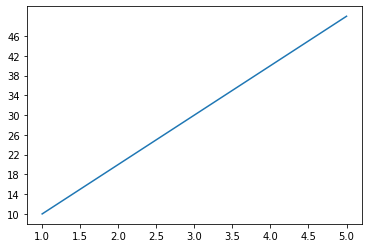

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1,2,3,4,5])
y = np.array([10,20,30,40,50])
plt.plot(x,y)
plt.yticks(np.arange(10,50,4))

In [ ]:
import glob
dataset_dir = "/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data"
glob.glob(dataset_dir+"/*/*")

['/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/noisy/0001.png',
 '/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/noisy/0002.png',
 '/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/noisy/0003.png',
 '/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/noisy/0004.png',
 '/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/noisy/0005.png',
 '/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/noisy/0006.png',
 '/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/noisy/0007.png',
 '/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/noisy/0008.png',
 '/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/noisy/0009.png',
 '/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/noisy/0010.png',
 '/content/drive/MyD

/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes
Cloning into 'ViDeNN'...
remote: Enumerating objects: 399, done.
remote: Counting objects: 100% (399/399), done.
remote: Compressing objects: 100% (387/387), done.
remote: Total 399 (delta 11), reused 388 (delta 10), pack-reused 0
Receiving objects: 100% (399/399), 222.87 MiB | 13.79 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Checking out files: 100% (372/372), done.


     |████████████████████████████████| 2.0 MB 5.2 MB/s 
     |████████████████████████████████| 4.2 MB 31.3 MB/s 
     |████████████████████████████████| 31.2 MB 95 kB/s 
  Created wheel for nibabel: filename=nibabel-2.3.0-py3-none-any.whl size=3190912 sha256=f7a99b5cc6b34e4a50a16e8f295ab1ad49eb9f4891ff5ada193a5f8f831f3b3d
  Stored in directory: /root/.cache/pip/wheels/e0/f4/fb/2c8f4a8f84d52a4692ff0ce7e52b23148e9e51583410388efb
Successfully built nibabel
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: nibabel
    Found existing installation: nibabel 3.0

/content


/content/drive/MyDrive/ML-Project-new/noise2noise


/content/drive/MyDrive/ML-Project-new/noise2noise


Validating with gaussian_noise_stddev:  25.0
Creating the run dir: results/00036-autoencoder
Copying files to the run dir
dnnlib: Running validation.validate() on localhost...
Traceback (most recent call last):
  File "config_raghu.py", line 225, in <module>
    args.func(args)
  File "config_raghu.py", line 175, in validate
    dnnlib.submission.submit.submit_run(submit_config, **validate_config)
  File "/content/drive/MyDrive/ML-Project-new/noise2noise/dnnlib/submission/submit.py", line 296, in submit_run
    run_wrapper(submit_config)
  File "/content/drive/MyDrive/ML-Project-new/noise2noise/dnnlib/submission/submit.py", line 249, in run_wrapper
    util.call_func_by_name(func_name=submit_config.run_func_name, submit_config=submit_config, **submit_config.run_func_kwargs)
  File "/content/drive/MyDrive/ML-Project-new/noise2noise/dnnlib/util.py", line 232, in call_func_by_name
    return func_obj(*args, **kwargs)
  File "/content/dri

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.8.0


drive  sample_data


NameError: ignored

NameError: ignored

NameError: ignored